C:\Users\alexa\AppData\Local\Temp\ipykernel_5216\592411483.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Fill missing values using forward fill


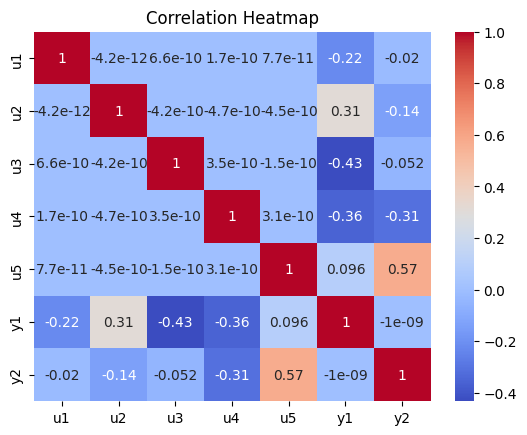

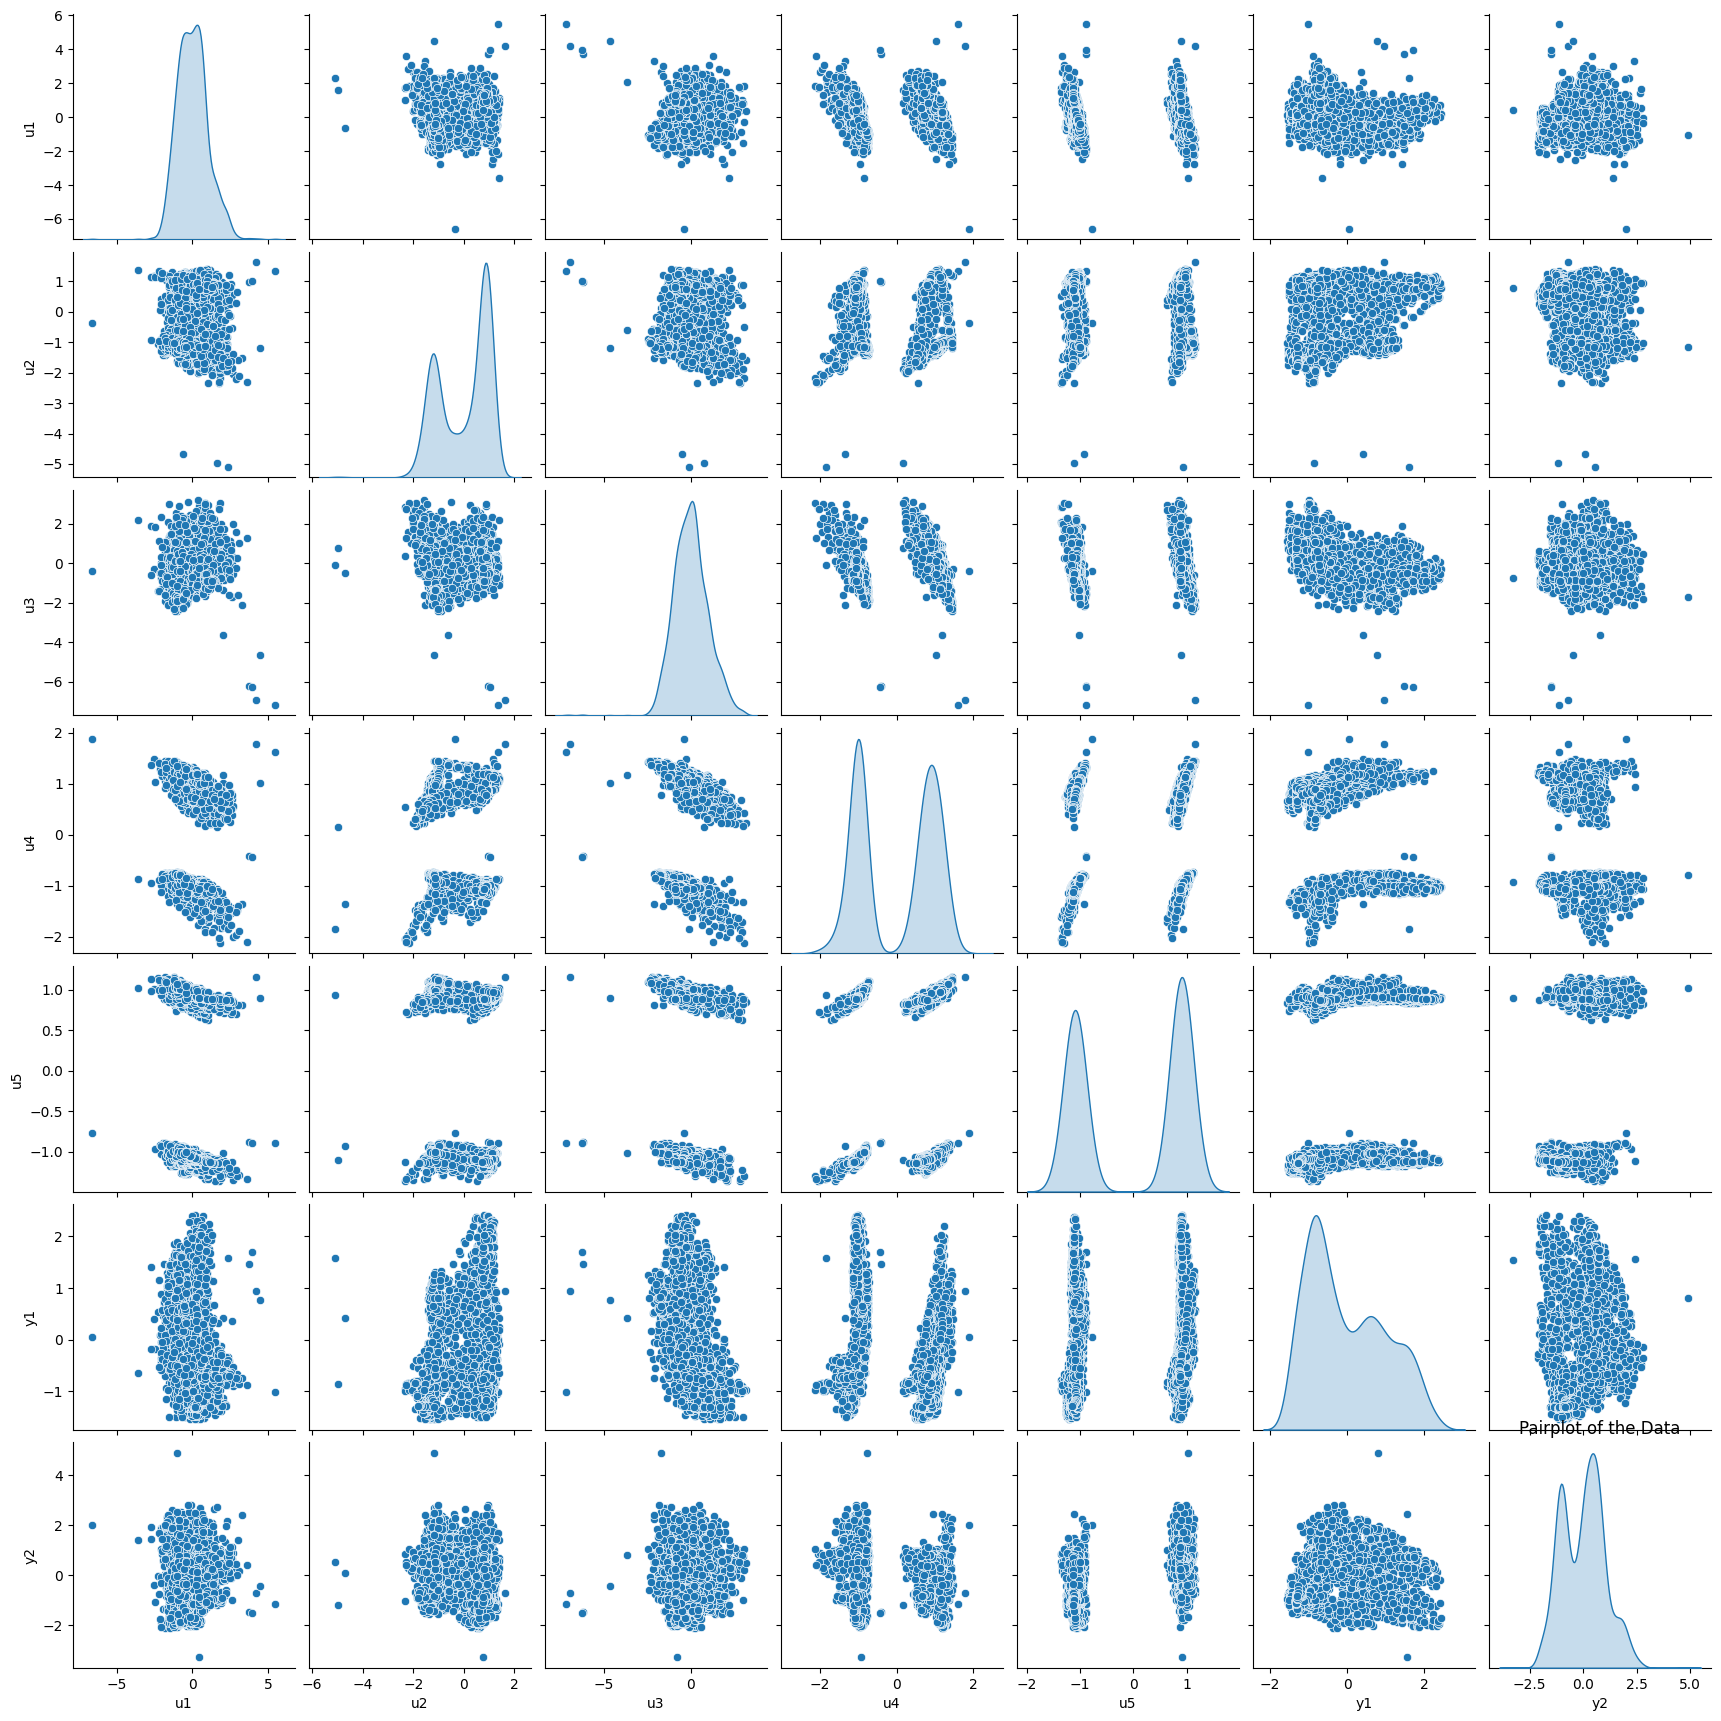

Mean Squared Error: 0.48903561173011156
R^2 Score: 0.4798988021160155
R² score is below 0.85, attempting polynomial regression...
Polynomial MSE: 0.4313721429521368
Polynomial R^2: 0.5407315301609577


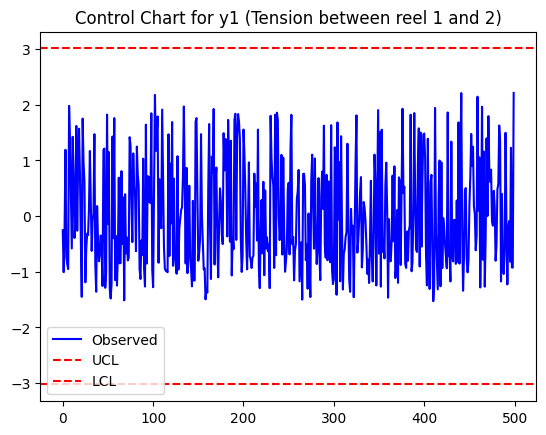

DPMO: 486000.0
Cpk: -0.34032360039019016

Model Development and Evaluation Complete
Final R² Score: 0.5407315301609577
Process Improvement using Six Sigma metrics has been quantified.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Load the dataset
data = pd.read_csv("processData.csv")  # Replace with actual dataset path if needed

# Step 1: Data Preprocessing
# Check for missing values and fill or drop them
data.isnull().sum()  # Check for missing values
data.fillna(method='ffill', inplace=True)  # Fill missing values using forward fill

# Step 2: Feature Scaling
# Scale the input features for better model performance
scaler = StandardScaler()
data[['u1', 'u2', 'u3', 'u4', 'u5']] = scaler.fit_transform(data[['u1', 'u2', 'u3', 'u4', 'u5']])

# Step 3: Splitting Data into Training and Test Sets
X = data[['u1', 'u2', 'u3', 'u4', 'u5']]  # Inputs
y = data[['y1', 'y2']]  # Outputs

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Exploratory Data Analysis (EDA)
# Visualize correlations between features and outputs using heatmap
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Step 5: Scatter Plots to Identify Relationships
sns.pairplot(data, diag_kind='kde')
plt.title("Pairplot of the Data")
plt.show()

# Step 6: Multiple Linear Regression Model
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
# Calculate Mean Squared Error and R^2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# If the R² score is below 0.85, consider using polynomial regression
if r2 < 0.85:
    print("R² score is below 0.85, attempting polynomial regression...")
    
    # Step 8: Polynomial Regression (if needed)
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X_train)
    
    # Train polynomial regression model
    model_poly = LinearRegression()
    model_poly.fit(X_poly, y_train)
    
    # Predict using the polynomial regression model
    y_poly_pred = model_poly.predict(poly.transform(X_test))
    
    # Evaluate polynomial regression model
    mse_poly = mean_squared_error(y_test, y_poly_pred)
    r2_poly = r2_score(y_test, y_poly_pred)
    
    print(f"Polynomial MSE: {mse_poly}")
    print(f"Polynomial R^2: {r2_poly}")
    
    # If the polynomial model is better, use it for further analysis
    if r2_poly > r2:
        model = model_poly
        y_pred = y_poly_pred

# Step 9: Statistical Process Control (SPC) Charts
# Calculate control limits (mean ± 3*std) for y1 (Tension between reel 1 and 2)
mean_y1 = y_train['y1'].mean()
std_y1 = y_train['y1'].std()
ucl_y1 = mean_y1 + 3 * std_y1
lcl_y1 = mean_y1 - 3 * std_y1

# Plot control chart for y1
plt.plot(y_test['y1'].values, label='Observed', color='blue')
plt.axhline(y=ucl_y1, color='red', linestyle='--', label='UCL')
plt.axhline(y=lcl_y1, color='red', linestyle='--', label='LCL')
plt.legend()
plt.title("Control Chart for y1 (Tension between reel 1 and 2)")
plt.show()

# Step 10: Real-Time Alarm System
# Detect anomalies based on control limits
def detect_anomalies(y_pred, ucl, lcl):
    anomalies = []
    for value in y_pred:
        if value > ucl or value < lcl:
            anomalies.append(True)
        else:
            anomalies.append(False)
    return anomalies

# Anomaly detection for the test predictions
anomalies = detect_anomalies(y_pred[:, 0], ucl_y1, lcl_y1)

# Step 11: Six Sigma Metrics
# Calculate DPMO (Defects Per Million Opportunities)
def calculate_dpm(data, defect_threshold=0.1):
    total_opportunities = len(data)
    defects = sum(data > defect_threshold)  # Adjust defect threshold as needed
    dpmo = (defects / total_opportunities) * 1e6
    return dpmo

# Calculate Cpk (Process Capability Index)
def calculate_cpk(data, specification_limits=(0.2, 0.8)):
    usl, lsl = specification_limits
    mean_data = np.mean(data)
    std_data = np.std(data)
    cpk = min((usl - mean_data) / (3 * std_data), (mean_data - lsl) / (3 * std_data))
    return cpk

# Calculate DPMO and Cpk for the predicted values of y1
dpm = calculate_dpm(y_pred[:, 0])
cpk = calculate_cpk(y_pred[:, 0])

print(f"DPMO: {dpm}")
print(f"Cpk: {cpk}")

# Final Conclusions
print("\nModel Development and Evaluation Complete")
print(f"Final R² Score: {r2 if r2 > r2_poly else r2_poly}")
print("Process Improvement using Six Sigma metrics has been quantified.")
